In [1]:
import pandas as pd
import numpy as np

In [2]:
dt=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/0a4a1b7c052ef7e81e77604796cc3429b1763db7/baseball.csv')
dt.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
# Datas Observation:
# w=>win- number of win the match. Target value is W.
# R=> run- number of runs made in match
# AB=>at bat- number of hit the ball 
# H=> hit- number of hit 
# 2B=> double base. number of time loaded the two base points by batter & get runs.
# 3B=> Triple- number of time loaded the third base points by batter & get runs.
# HR=> home run-number ot time send to out of boundery and batter touched all four base & made four runs in a hit.
# BB=> base ball- walk runs. if hitter not swing bat and four ball is out of striker zone then batter get opportunity to go base one.
# SO=> Stike out- number of times are strike out. batter swing the bat but unable to connect with balls and coninoue three balls are came into strike zone.
# SB=>stolen base-number of bases advanced by the runner while the ball is in the possession of the defense
# RA=> Run allowed-  number of runners allowed to score
# ER=> erning Run-number of runs that did not occur as a result of errors or passed balls
# ERA=> earn run average-total number of earned runs (see "ER" above), multiplied by 9, divided by innings pitched.its lower is better.
# CG=>Complete game- number of games where player was the only pitcher for their team. 
# SHO=>Shutout- number of times a single pitcher pitches a complete game and does not allow the opposing team to score a run.
# SV=> Save-number of time a pitcher win the innings when innins was in a prescribe circumstance and to win three or four runs nedded and finished the game without any losing lead.
# E=> errors- number of time fielder faild to make a play.


In [4]:
# cheking shape the dataset
dt.shape        # 30 rows & 17 Columns

(30, 17)

In [5]:
# Cheking nan
dt.isna().sum()   # No missing or null values are present in dataset.

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [6]:
# Cheking information of dataset
dt.info()    # all columne value is integer & float number & no null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [7]:
# describe the data for observations
dt.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [8]:
#  Observation
# 1. no null value is present in any column
# 2. as per my obseravtion data is normal distributed in all columns. and quantile range also okay
# 3. We will check & confirm that observation is correct or not.


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

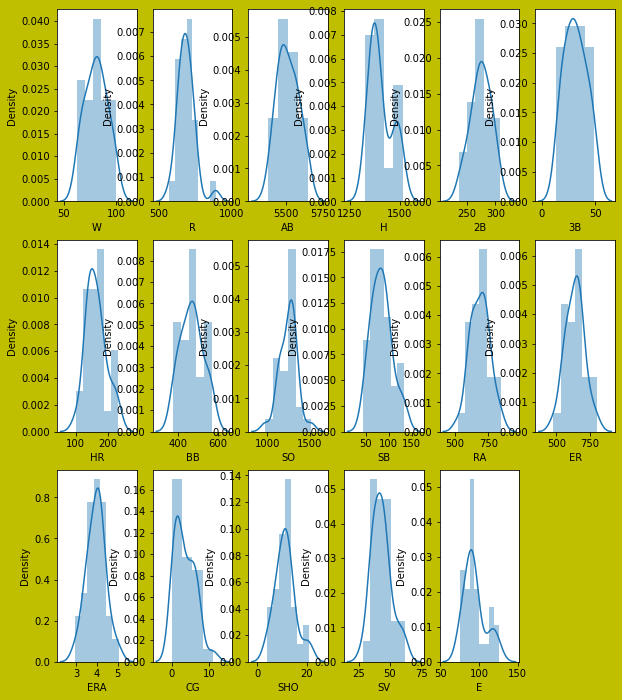

In [10]:
# cheking & confirm data is normal distributed
plt.figure(figsize=(10,12),facecolor='y')
plotnumber=1
for i in dt:
    if plotnumber<=17:
        ax=plt.subplot(3,6,plotnumber)
        sns.distplot(dt[i])
        plt.xlabel(i,fontsize=10)
        
    plotnumber+=1
    
plt.show()
    
    


In [11]:
# observation
#  data is normal distributed of all column data

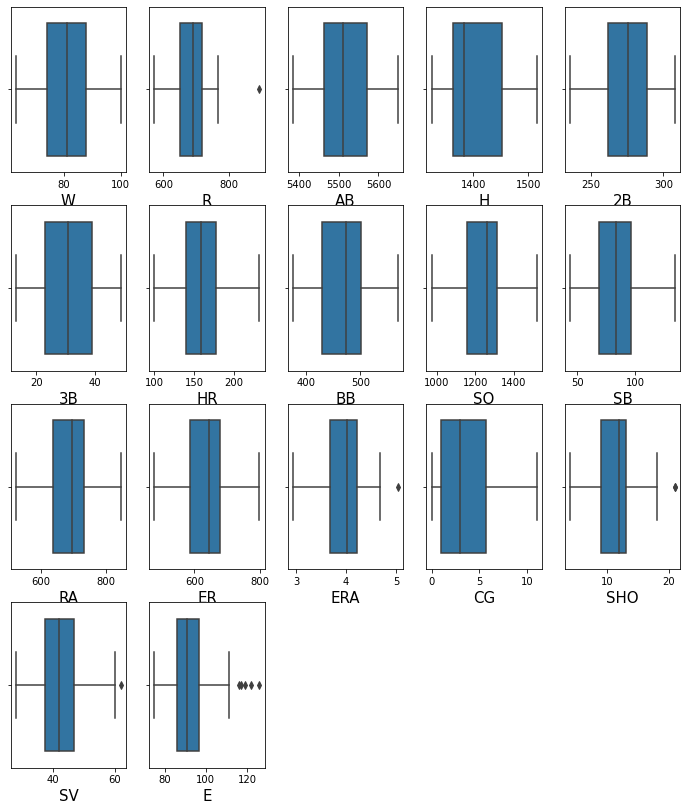

In [12]:
# cheking Outlier using box plot.
plt.figure(figsize=(12,14))
plotnumber=1
for column in dt:
    if plotnumber<=17:
        ax=plt.subplot(4,5,plotnumber)
        sns.boxplot(dt[column])
        plt.xlabel(column, fontsize=15)
        
    plotnumber+=1
plt.show()

In [13]:
# observation
# R- outlier present
# ERA- outlier present
# SHO- outlier present
# SV- outlier present
# E- outlier present


In [14]:
# handel outlier by using quantile technque

In [15]:
# for getting iqr

q3=dt.quantile(0.75)
q1=dt.quantile(0.25)
iqr=q3-q1

In [16]:
#  handle Outlir R column
higher_R=q3.R+(1.5*iqr.R)  # find hiher side outlier
higher_R


818.75

In [17]:
index=np.where(dt['R']>higher_R)     # find index number of higher outlier
dt=dt.drop(dt.index[index])          # drop the index
dt.reset_index()                     # reset index of data
dt.shape                             # shape the data

(29, 17)

In [18]:
#  handle Outlir ERA column
higher_ERA=q3.ERA+(1.5*iqr.ERA)  # find hiher side outlier
higher_ERA


5.026250000000001

In [19]:
index=np.where(dt['ERA']>higher_ERA)   # find index number of higher outlier
dt=dt.drop(dt.index[index])            # drop the index
dt.reset_index()                       # reset index of data
dt.shape                               # shape the data 

(28, 17)

In [20]:
#  handle Outlir SHO column
higher_SHO=q3.SHO+(1.5*iqr.SHO)  # find hiher side outlier
higher_SHO

19.0

In [21]:
index=np.where(dt['SHO']>higher_SHO)   # find index number of higher outlier
dt=dt.drop(dt.index[index])            # drop the index
dt.reset_index()                       # reset index of data
dt.shape

(26, 17)

In [22]:
#  handle Outlir SV column
higher_SV=q3.SV+(1.5*iqr.SV)  # find hiher side outlier
higher_SV

61.0

In [23]:
index=np.where(dt['SV']>higher_SV)   # find index number of higher outlier
dt=dt.drop(dt.index[index])            # drop the index
dt.reset_index()                       # reset index of data
dt.shape

(25, 17)

In [24]:
#  handle Outlir E column
higher_E=q3.E+(1.5*iqr.E)  # find hiher side outlier
higher_E

112.875

In [25]:
index=np.where(dt['E']>higher_E)   # find index number of higher outlier
dt=dt.drop(dt.index[index])            # drop the index
dt.reset_index()                       # reset index of data
dt.shape

(20, 17)

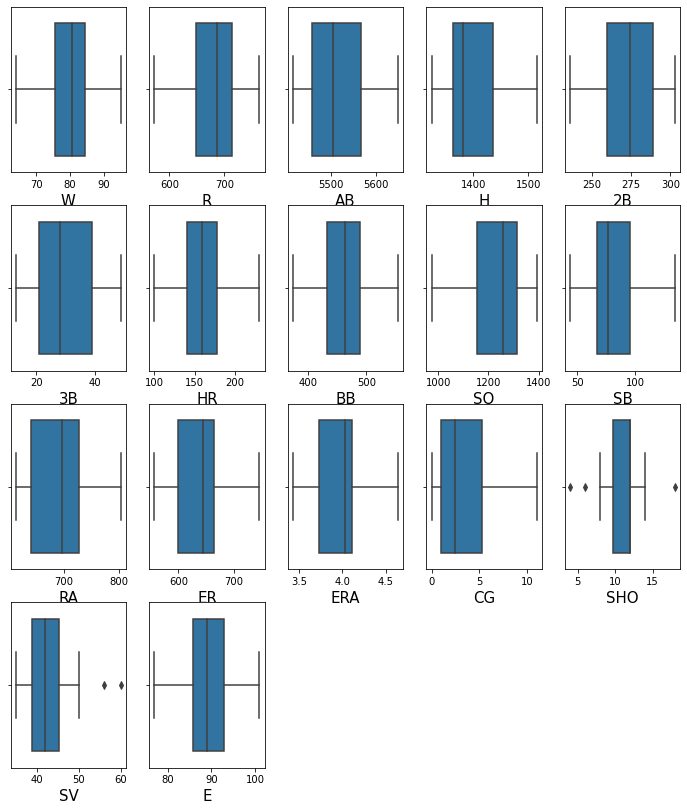

In [26]:
# check outlier droped using boxplot
plt.figure(figsize=(12,14))
plotnumber=1
for column in dt:
    if plotnumber<=17:
        ax=plt.subplot(4,5,plotnumber)
        sns.boxplot(dt[column])
        plt.xlabel(column, fontsize=15)
        
    plotnumber+=1
plt.show()

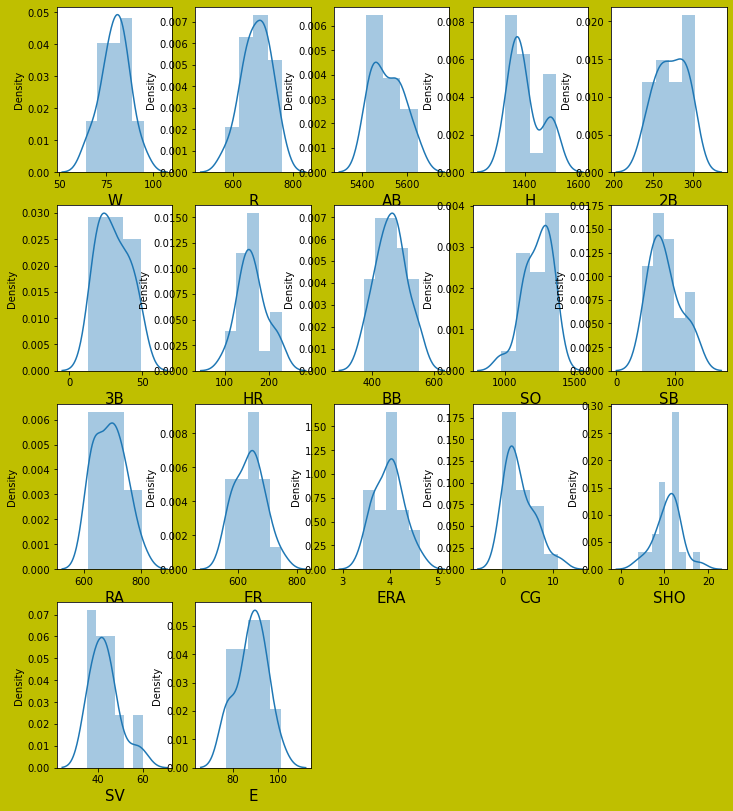

In [27]:
# Checking data distributed

plt.figure(figsize=(12,14),facecolor='y')
plotnumber=1
for column in dt:
    if plotnumber<=17:
        ax=plt.subplot(4,5,plotnumber)
        sns.distplot(dt[column])
        plt.xlabel(column, fontsize=15)
        
    plotnumber+=1
plt.show()

In [28]:
# Observation
#  data is good distributed of all columns

In [29]:
# co rrelationship between feature & lable
dt.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.664613,0.027707,0.078970,0.501117,-0.060975,0.386591,0.054778,-0.112958,-0.259240,-0.707841,-0.684375,-0.707450,0.000958,0.157447,0.572890,-0.082535
R,0.664613,1.000000,0.469861,0.385690,0.535319,0.114559,0.594316,0.351671,0.121402,-0.025584,-0.212049,-0.187813,-0.227161,-0.007971,-0.048655,0.169558,-0.088541
AB,0.027707,0.469861,1.000000,0.781273,0.494489,0.464465,0.027794,0.069801,-0.091785,0.330095,0.348298,0.393995,0.317000,0.018335,-0.061948,-0.013010,0.163275
H,0.078970,0.385690,0.781273,1.000000,0.545859,0.651514,-0.278711,-0.084576,-0.406969,0.401832,0.203982,0.277340,0.249744,0.198161,0.161967,-0.073774,-0.181437
2B,0.501117,0.535319,0.494489,0.545859,1.000000,0.367722,-0.031140,0.315531,-0.148303,0.176088,-0.239770,-0.250479,-0.293325,0.393197,0.164514,0.249403,-0.042630
3B,-0.060975,0.114559,0.464465,0.651514,0.367722,1.000000,-0.419930,-0.427679,-0.213592,0.557762,0.242080,0.295701,0.278939,0.003651,0.119039,-0.101118,-0.257193
HR,0.386591,0.594316,0.027794,-0.278711,-0.031140,-0.419930,1.000000,0.364324,0.624167,-0.189567,-0.225423,-0.213640,-0.250566,-0.107611,-0.066284,0.143601,0.055023
BB,0.054778,0.351671,0.069801,-0.084576,0.315531,-0.427679,0.364324,1.000000,0.313191,-0.063280,-0.042415,-0.093157,-0.113309,0.356094,-0.051977,-0.101424,0.081413
SO,-0.112958,0.121402,-0.091785,-0.406969,-0.148303,-0.213592,0.624167,0.313191,1.000000,-0.046822,-0.020129,-0.071031,-0.102361,-0.081832,0.141591,-0.131985,0.061607
SB,-0.259240,-0.025584,0.330095,0.401832,0.176088,0.557762,-0.189567,-0.063280,-0.046822,1.000000,0.029920,0.068020,0.046978,-0.014465,0.027137,-0.220894,-0.235427


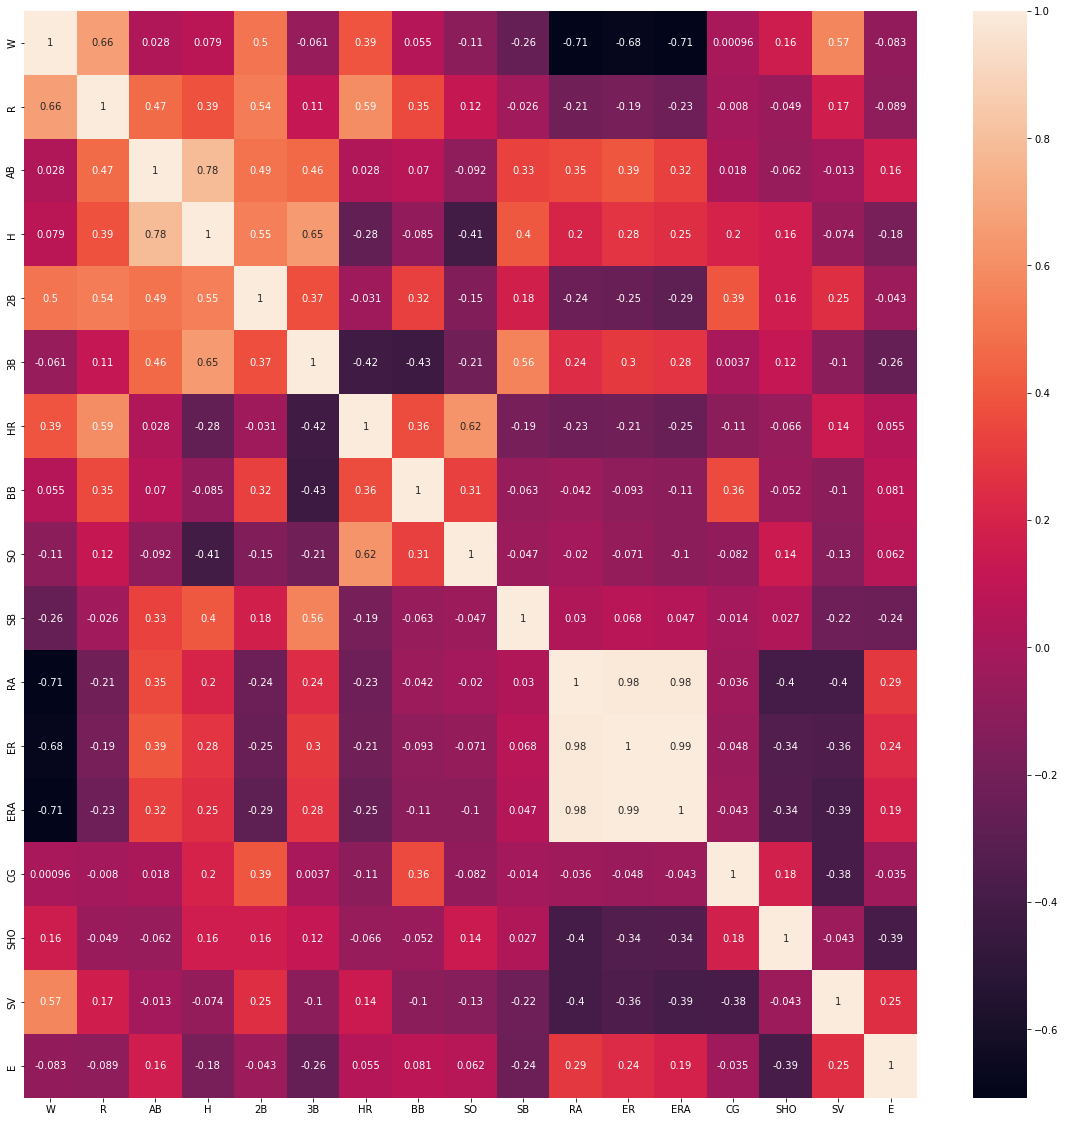

In [30]:
# correlation show with heatmap
plt.figure(figsize=(20,20))
sns.heatmap(dt.corr(),annot=True)
plt.savefig('correlation baseball.jpg')
plt.show()


In [31]:
# Observation
# W vs E-> relation between is (-)8.3%. There are negetive relationship
# W vs SV-> relation between is 57%. There are positive and good relationship.
# W vs SHO-> relation between is 16%. There are Positive relationship
# W vs CG-> relation between is 0.09%. There are positive & very lower relationship. only good relationship with CG vs 2B & BB
# W vs ERA-> relation between is (-)71%. There are negetive and very strong relationship. but ERA vs RA & ER relationship very strong 98% & 99%
# W vs ER-> relation between is (-)68%. There are negetive & strong relationship. but ER vs RA is very strong relationship 98%.
# W vs RA-> relation between is (-)71%. There are negetive & strong relationship.
# W vs SB-> relation between is (-)26%. There are negetive and good relationship
# W vs SO-> relation between is (-)11%. There are negetive relationship. SO vs HR relation 62%. 
# W vs BB-> relation between is 5.5%. There are positive relationship. BB vs others columns relationship is good.
# W vs HR-> relation between is 39%. There are positive & strong relationship. HR vs others columns relationship is good.
# W vs 3B-> relation between is (-)6.1%. There are negetive relationship. but 3B vs others relationship is good.
# W vs 2B-> relation between is 50%. There are positive relationship and 2B vs others relationship is very good.
# W vs H-> relation between is 7.9%. There are positive relationship and H vs others relationship is very good
# W vs AB-> relation between is 2.8%. There are positive relationship and AB vs R relationship is strong 47% 
# W vs R-> relation between is 66%. There are positive & strong relationship.

In [32]:
# Separate feature & lable in two variable (x=feature & y=lable)
x=dt.drop('W',axis=1)
y=dt.W

In [33]:
x.shape

(20, 16)

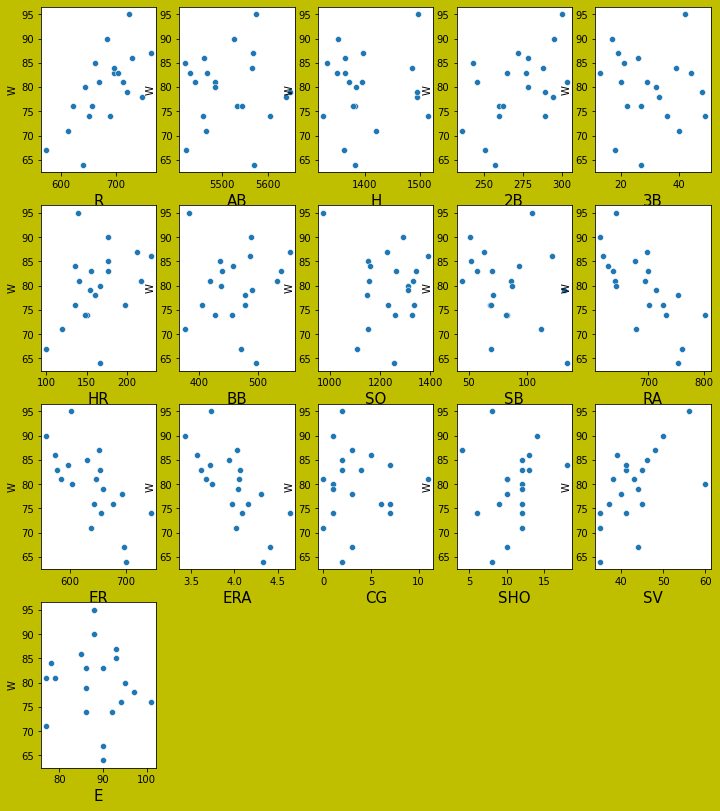

In [34]:
# checking relationship between feature & lable
plt.figure(figsize=(12,14),facecolor='y')
plotnumber=1
for column in x:
    if plotnumber<=17:
        ax=plt.subplot(4,5,plotnumber)
        sns.scatterplot(x[column],y)
        plt.xlabel(column, fontsize=15)
        plt.ylabel('W')
        
    plotnumber+=1
plt.show()


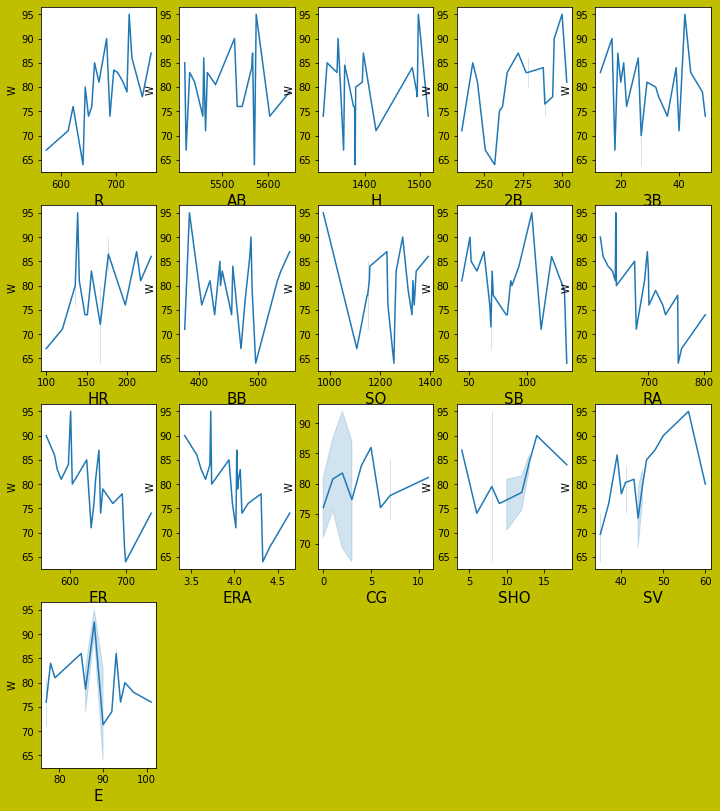

In [35]:
plt.figure(figsize=(12,14),facecolor='y')
plotnumber=1
for column in x:
    if plotnumber<=17:
        ax=plt.subplot(4,5,plotnumber)
        sns.lineplot(x[column],y)
        plt.xlabel(column, fontsize=15)
        plt.ylabel('W')
        
    plotnumber+=1
plt.show()

In [36]:
# W vs E-> There are negetive relationship. 
# W vs SV-> There are positive and good relationship.
# W vs SHO-> There are Positive relationship
# W vs CG-> There are positive & very lower relationship. 
# W vs ERA-> There are negetive and very strong relationship.
# W vs ER-> There are negetive & strong relationship.
# W vs RA-> There are negetive & strong relationship.
# W vs SB-> There are negetive and good relationship
# W vs SO-> There are negetive relationship. 
# W vs BB-> There are positive relationship.
# W vs HR-> There are positive & strong relationship. 
# W vs 3B-> There are negetive relationship.
# W vs 2B-> There are positive relationship 
# W vs H->  There are positive relationship 
# W vs AB-> There are positive relationship 
# W vs R->  There are positive & strong relationship.

In [37]:
# cheking Skewness
x.skew().sort_values(ascending=False)

CG     1.082534
SV     1.043927
H      0.817990
SB     0.639024
HR     0.360341
AB     0.345887
RA     0.304559
3B     0.268007
ERA    0.218418
ER     0.213161
BB     0.079234
SHO   -0.135227
2B    -0.149289
E     -0.243990
R     -0.316726
SO    -0.791526
dtype: float64

In [38]:
# minimize the skewness using power transformer
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
x_new=pt.fit_transform(x) 

In [39]:
x=pd.DataFrame(x_new,columns=x.columns)  
x.skew().sort_values(ascending=False)   # minimize skewness as before & arranging ascending order.

AB     0.276995
SHO    0.059966
SV     0.057785
RA     0.035185
SB     0.012717
ERA    0.006336
ER     0.005813
H      0.000000
HR    -0.003702
BB    -0.013838
CG    -0.020258
E     -0.037752
R     -0.038045
3B    -0.049845
2B    -0.057611
SO    -0.112317
dtype: float64

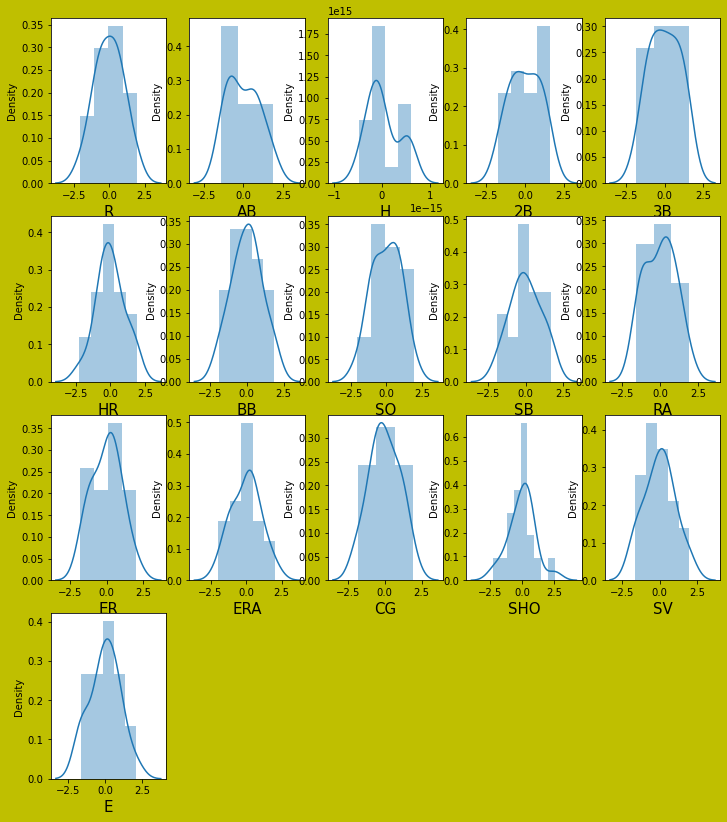

In [40]:
# check skew minimize or not with graph

plt.figure(figsize=(12,14),facecolor='y')
plotnumber=1
for column in x:
    if plotnumber<=17:
        ax=plt.subplot(4,5,plotnumber)
        sns.distplot(x[column])
        plt.xlabel(column, fontsize=15)
        
    plotnumber+=1
plt.show()

In [41]:
# Observation
#  no skewness is has in any data column

In [42]:
# Standarized the data using by standers Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scler=scaler.fit_transform(x)   # standarized the feature data

In [43]:
# handel multicolinearity problem
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [44]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scler,i) for i in range(x_scler.shape[1])]
vif['feature']=x.columns
vif

,vif,feature
0,23.195560,R
1,85.371690,AB
2,15.598077,H
3,15.912167,2B
4,24.513273,3B
5,25.286712,HR
6,9.066693,BB
7,6.814229,SO
8,4.399911,SB
9,247.564187,RA


In [45]:
# observation
# here has multicollinearity problem present. I asume more than 30 vif, will drop that column
# AB column vif score is more than 30. drop it
# RA column vif score is more than 30. drop it
# ER column vif score is more than 30. drop it
# ERA column vif score is more than 30. drop it


In [46]:
# Drop the column where multicollinearity problem is present
x_scler=dt.drop(columns=['AB','RA','ER','ERA'])
x_scler.shape

(20, 13)

In [47]:
x.shape

(20, 16)

In [48]:
#  Train test spilt the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test=train_test_split(x_scler,y,test_size=0.25,random_state=88)

In [49]:
# Create Regression Ml Model
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)
pred=lm.predict(x_test)

In [50]:
# cheking score of model using r2
from sklearn.metrics import r2_score


In [51]:
r2_score(y_test,pred)

1.0

In [52]:
lm.score(x_train,y_train)

1.0

In [53]:
lm.score(x_test,y_test)

1.0

In [54]:
# select best feature
from sklearn.feature_selection import SelectKBest,f_classif

In [55]:
best_feature=SelectKBest(score_func=f_classif, k=10)
fit=best_feature.fit(x_scler,y)
df_scor=pd.DataFrame(fit.scores_)
df_column=pd.DataFrame(x.columns)


In [56]:
feature_scor=pd.concat([df_scor,df_column],axis=1)
feature_scor.columns=['name','scores']

In [57]:
# print(feature_scor.nlargest(10,'scores'))

In [58]:
# Import KNN Regressor
from sklearn.neighbors import KNeighborsRegressor


In [59]:
# Difine function to get train & test Result
def metric_score(reg, x_train,x_test,y_train,y_test,train=True):
    if train:
        pred=reg.predict(x_train)
        print('\n------Train Result--------')
        print(f'R2 score:{r2_score(y_train,pred)*100:.2f}%')
        
    elif train==False:
        pred=reg.predict(x_test)
        print('\n------Test Result--------')
        print(f'R2 score:{r2_score(y_test,pred)*100:.2f}%')

In [60]:
knn=KNeighborsRegressor()

In [61]:
# knn.fit(x_train,y_train)
# pred_knn=knn.predict(x_test)
# scor=r2_score(y_test,pred_knn)
# scor

In [62]:
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [63]:
# Call the function for Train Result & Test Result
metric_score(knn,x_train,x_test,y_train,y_test,train=True)
metric_score(knn,x_train,x_test,y_train,y_test,train=False)


------Train Result--------
R2 score:31.27%

------Test Result--------
R2 score:27.32%


In [64]:
# cheking model underfitting or overfitting

In [65]:
from sklearn.model_selection import cross_val_score

In [66]:
cross_val_score(knn,x_scler,y,cv=10)

array([-2.31777778,  0.3024    ,  0.70414201, -0.36      ,  0.21875   ,
       -1.95604938,  0.09147929,  0.75277778,  0.06878893, -5.0448    ])

In [67]:
cross_val_score(knn,x_scler,y,cv=10).mean() # cross validetion score

-0.7540289153605257

In [68]:
#  Observation: cross validation score is coming negetive 75%

In [69]:
# Hyperperameter tuning use for improve the result
from sklearn.model_selection import GridSearchCV

In [70]:
# fixed the parameter 
param={'algorithm':['kd_tree','brute'],
      'leaf_size':[10,12,14,15,16,18,19,20],
      'n_neighbors':[9,11,13,15,17,19,21]}

In [71]:
grid=GridSearchCV(estimator=knn,param_grid=param)  # create Gridsearch CV model & train the data in it
grid.fit(x_train,y_train) 

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [10, 12, 14, 15, 16, 18, 19, 20],
                         'n_neighbors': [9, 11, 13, 15, 17, 19, 21]})

In [72]:
grid.best_params_  # finding best parameters through Gridsearcv 

{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_neighbors': 9}

In [73]:
knn=KNeighborsRegressor(algorithm = 'kd_tree', leaf_size = 10, n_neighbors = 9) # use best parameters in KNN model

In [74]:
knn.fit(x_train,y_train) # train the data

KNeighborsRegressor(algorithm='kd_tree', leaf_size=10, n_neighbors=9)

In [75]:
# call the function to get train result & test Result to improve the model result
metric_score(knn,x_train,x_test,y_train,y_test,train=True)
metric_score(knn,x_train,x_test,y_train,y_test,train=False)


------Train Result--------
R2 score:8.86%

------Test Result--------
R2 score:-15.48%


In [76]:
# Observation
# Result is not good. test result came negetive.


In [77]:
# create DecisionTreeRegressor model
from sklearn.tree import DecisionTreeRegressor

In [78]:
# Difine function to get train & test Result
def metric_score(reg, x_train,x_test,y_train,y_test,train=True):
    if train:
        pred=reg.predict(x_train)
        print('\n------Train Result--------')
        print(f'R2 score:{r2_score(y_train,pred)*100:.2f}%')
        
    elif train==False:
        pred1=reg.predict(x_test)
        print('\n------Test Result--------')
        print(f'R2 score:{r2_score(y_test,pred1)*100:.2f}%')

In [79]:
dt_reg=DecisionTreeRegressor()
dt_reg.fit(x_train,y_train)

DecisionTreeRegressor()

In [80]:
# call the function to get train result & test Result to improve the model result
metric_score(dt_reg,x_train,x_test,y_train,y_test,train=True)
metric_score(dt_reg,x_train,x_test,y_train,y_test,train=False)


------Train Result--------
R2 score:100.00%

------Test Result--------
R2 score:-340.14%


In [81]:
# Observation
# Model is not working good. 

In [82]:
# cheking model underfitting or overfitting
from sklearn.model_selection import cross_val_score
cross_val_score(dt_reg,x_scler,y,cv=2).mean()


0.1644881940296949

In [83]:
# model is overfitting

In [84]:
# Hyperperameter Tuning to improve result

In [85]:
from sklearn.model_selection import GridSearchCV


In [86]:
# fixed the parameter to find best parameter
param={'criterion':['gini','entropy'],
      'max_depth':[range(3,10)],
      'min_samples_leaf':[range(2,9)],
      'min_samples_split':[range(2,8)],
      'max_leaf_nodes':[range(2,10)]}

In [87]:
grid_dt=GridSearchCV(estimator=dt_reg,param_grid=param,cv=2)

In [88]:
# grid_dt.fit(x_train,y_train)

In [89]:
# Create Random Forest model
from sklearn.ensemble import RandomForestRegressor

In [90]:
def matrics_score(rer,x_train,x_test,y_train,y_test,train=True):
    if train:
        pred=reg.predict(x_train)
        print('--------Train Result-------')
        print(f'Accuracy score:{r2_score(y_train,pred)*100:0.2f}%')
    elif train ==False:
        pred=reg.predict(x_test)
        print('--------Test Result-------')
        print(f'Accuracy score:{r2_score(y_test,pred)*100:0.2f}%')
        

In [91]:
ran=RandomForestRegressor()


In [92]:
ran.fit(x_train,y_train)

RandomForestRegressor()

In [93]:
# call the function to get train result & test Result to improve the model result
metric_score(ran,x_train,x_test,y_train,y_test,train=True)
metric_score(ran,x_train,x_test,y_train,y_test,train=False)


------Train Result--------
R2 score:96.11%

------Test Result--------
R2 score:70.29%


In [107]:
# Checking cross validation score for overfitting or not
cross_val_score(ran,x_scler,y,cv=6).mean()


0.7588030949520523

In [95]:
# Observation 
# Cross validation score is good 77%

In [96]:
# Hyperperameter Tuning to improve result
from sklearn.model_selection import GridSearchCV

In [97]:
# fixed the parameter to find best parameter
param={'n_estimators':[2,3,5,6,7,8,10],
       'criterion':['entropy','gini'],
       'max_depth':[3,5],
       'min_samples_leaf':[2,5],
       'min_samples_split':[2,5],
       'max_leaf_nodes':[2,7]}

In [98]:
grd=GridSearchCV(estimator=ran,param_grid=param)
# grd.fit(x_train,y_train)

In [99]:
# Model Valuation of Random Forest model
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [100]:
ran_pred=ran.predict(x_test)
ran_pred

array([81.2 , 83.75, 73.88, 82.55, 78.88])

In [101]:
mean_absolute_error(y_test,ran_pred)

1.6

In [102]:
mean_squared_error(y_test,ran_pred) # MSE error is 33%

3.3747599999999993

In [103]:
np.sqrt(mean_squared_error(y_test,ran_pred))   # RMSE is 18%

1.8370519861996284

In [104]:
# save model 
import pickle
pickle.dump(ran,open('randomForest_model','wb'))